# Model 1: Low resolution Detection of flooded tiles

The output of this model is used to train model 2

In [111]:
import numpy as np
import xarray as xr
import src.baseline_model01 as bm
import os

# Pre processing

The constructor handle a small amount of data processing :

* Pre-processing of the static data 
* Construction of the labels from raw data
* Loading of the dynamic data

And the splitting of the dataset into test / train / validation set follonwing defined start date and end date. The validation set could be useful as an alternative for Cross Validation to find optimal hyper-parameters.

In [112]:
baseline_model_generator = bm.BaseLineModel(
    "localdata/final_label_Full_ERA5.nc",
    dynamic_features_path = "localdata/raw/ERA5_train.nc",
    static_features_path = "localdata/static_ERA5.nc",
    train_start = "2002-08-03", # date where to split train test
    train_end = "2003-01-01", # date where to split train test
    test_start = "2003-01-01", # date where to split train test
    test_end = "2003-03-17", # date where to split train test
    name = "Model_01_default",
    seed=0
)

/home/karim/magistere/S6/IBI/Flood_Prediction_starting_kit/src/baseline_model01.py:114: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  self.x_dim = self.labels.dims['x']
/home/karim/magistere/S6/IBI/Flood_Prediction_starting_kit/src/baseline_model01.py:115: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  self.y_dim = self.labels.dims['y']
/home/karim/magistere/S6/IBI/Flood_Prediction_starting_kit/src/baseline_model01.py:116: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To ac

# Training

The baseline model used here is a random forest (Random forest is used as an exemple of a basic ML approach sometime used for flood prediction [<a id="1" href="https://www.tandfonline.com/doi/full/10.1080/19475705.2017.1308971">1</a>,<a id="2" href="https://www.sciencedirect.com/science/article/abs/pii/S0022169415004217">2</a>,<a id="3" href="https://www.sciencedirect.com/science/article/abs/pii/S004896971934971X">3</a>]), it is by no way the only approach for such endeavor.

To train the model the following parameters must be defined :

* selected static features (geospatial data)
* selected dynamic features (climate data):
   * Depth of history to process climate features
   * Usage of climate feature derivative  


## References
<a id="1" href="https://www.tandfonline.com/doi/full/10.1080/19475705.2017.1308971">[1]</a> 
Lee, S., Kim, J. C., Jung, H. S., Lee, M. J., & Lee, S. (2017). Spatial prediction of flood susceptibility using random-forest and boosted-tree models in Seoul metropolitan city, Korea. Geomatics, Natural Hazards and Risk, 8(2), 1185-1203.

<a id="2" href="https://www.sciencedirect.com/science/article/abs/pii/S0022169415004217">[2]</a>
Wang, Z., Lai, C., Chen, X., Yang, B., Zhao, S., & Bai, X. (2015). Flood hazard risk assessment model based on random forest. Journal of Hydrology, 527, 1130-1141.

<a id="3" href="https://www.sciencedirect.com/science/article/abs/pii/S004896971934971X">[3]</a>
Chen, W., Li, Y., Xue, W., Shahabi, H., Li, S., Hong, H., ... & Ahmad, B. B. (2020). Modeling flood susceptibility using data-driven approaches of naïve bayes tree, alternating decision tree, and random forest methods. Science of The Total Environment, 701, 134979.


In [113]:
model, acc = baseline_model_generator.train_model([True, # 'soilgrid_bdod'
                                                  True, # 'soilgrid_cfvo'
                                                  False, # 'soilgrid_silt'
                                                  True, # 'soilgrid_clay'
                                                  False, # 'soilgrid_sand' 
                                                  False, # 'depth_to_bedrock'
                                                  True, # 'altitude'
                                                  False, #  'aspect'
                                                  True, # 'slope'
                                                  False, # 'water_density'
                                                  True, # 'watershed'
                                                  False, # 'topological_catchment_areas'
                                                  True, # 'dist_sea'
                                                  True, # 'dist_riv'
                                                  True, # 'tp'
                                                  True, # 't2m'
                                                  False, # 'use deriv'
                                                  250, # nb. Trees
                                                  6, # Trees dept
                                                  83, # Hist dept 1
                                                  11 # Hist dept 2
                                                  ], False)

train_model [True, True, False, True, False, False, True, False, True, False, True, False, True, True, True, True, False, 250, 6, 83, 11]
score 0.8540879398515703


# Model Analysis

We propose a few helper methods for model analysis, such as :

* Feature importance
* Graph of metrics such as ROC, AP
* Results mapping


#### Feature importance method

In [116]:
baseline_model_generator.compute_all_metrics()

Train :
roc : 0.9792518643277262
BrierScore : 0.07635494813297465
f1 : 0.4926042133572389
precision : 0.3285500747384155
recall : 0.9838854073410922
acc : 0.9003784211915867

Test :
roc : 0.8175334007483586
BrierScore : 0.19710634409169045
f1 : 0.4863855609148903
precision : 0.3432901383703053
recall : 0.8340448239060833
acc : 0.7094957317609786

Val :
roc : 0.8175334007483586
BrierScore : 0.19710634409169045
f1 : 0.4863855609148903
precision : 0.3432901383703053
recall : 0.8340448239060833
acc : 0.7094957317609786

f1, precision, recall and acc are computed at threshold 0.5


In [117]:
#baseline_model_generator.print_feature_importance()

#### ROC curve

auc_graph accept a data set name (train / test / val), a metric by default it will output results for a

Train


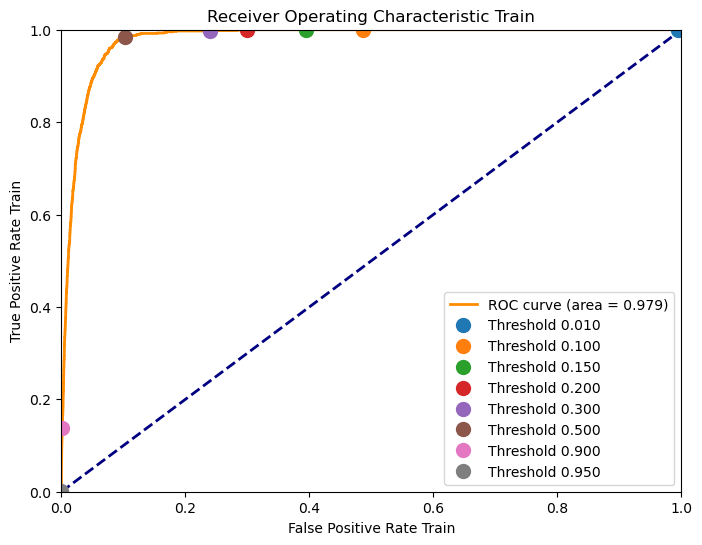

AUC: 0.979251864327726
Test


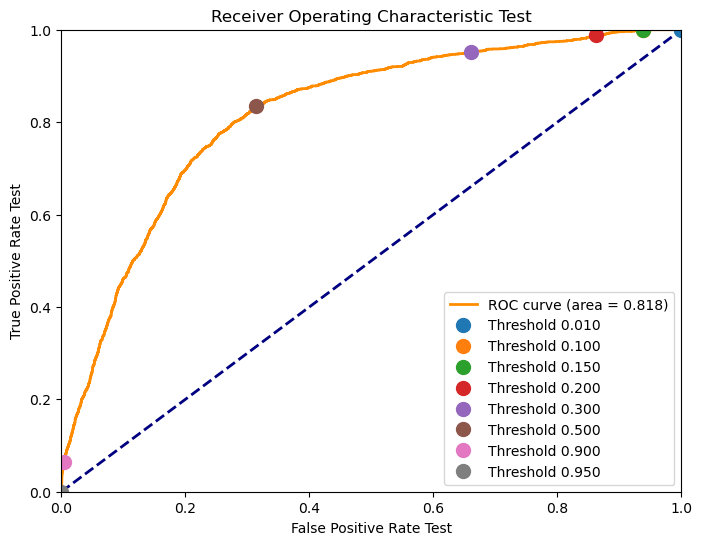

AUC: 0.8175334007483586


In [118]:
baseline_model_generator.auc_graph(dataset=["Train","Test"],metrics="", key_thresholds=[0.01,0.1,0.15, 0.2,0.3, 0.5, 0.9, 0.95])

#### Prediction map

In [119]:
baseline_model_generator.save_prediction_map(save_path = "graph/model1/predictions/")

#### Differences between labels and predictions

In [120]:
baseline_model_generator.save_prediction_map_and_labels(save_path =  "graph/model1/label_and_pred/")

#### Classification map at all threshold

In [121]:
baseline_model_generator.save_FP_FN_map(save_path = "graph/model1/FP_FN/", thresholds = [0.2, 0.3, 0.5, 0.7])

#### Error Map

In [122]:
baseline_model_generator.save_error_map(save_path="graph/model1/error_map/")

# Data computation for the second model

We choose to use the M1 model score (M1_score) as a dynamic feature for the M2 model. 
The following part create two Xarrays with M1 model score at Full Resolution and ERA5 resolution.


## Training Data
#### Creation of the M1 score Xarray at ERA5 resolution

In [123]:
baseline_model_generator.compute_full_grid()
Full_Rez = xr.open_dataset("localdata/final_label_Full_Rez.nc")

xr_array_score = xr.DataArray(baseline_model_generator.full_grid_all, 
                              dims=["time", "y", "x"],
                              coords={"time": Full_Rez.time, 
                                      "x": baseline_model_generator.labels.x, 
                                      "y": baseline_model_generator.labels.y},
                              name="M1_score")

xr_array_score = xr_array_score.astype('float32')
os.remove('localdata/Model1_score_ERA5_Rez_v2.nc')
xr_array_score.to_netcdf('localdata/Model1_score_ERA5_Rez_v2.nc', engine='h5netcdf')

In [124]:
xr_array_score = xr.open_dataset('localdata/Model1_score_ERA5_Rez_v2.nc')

#### Creation of the M1 score Xarray at Full Resolution

In [125]:
Full_Rez = xr.open_dataset("localdata/final_label_Full_Rez.nc")
small_interp = xr_array_score['M1_score'].interp(x=Full_Rez.x, y=Full_Rez.y, method='nearest')
Full_Rez = Full_Rez.rename({'__xarray_dataarray_variable__': 'M1_score'})

expanded_score = Full_Rez.copy()
expanded_score['M1_score'] = small_interp

expanded_score['M1_score'] = expanded_score['M1_score'].astype('float32')

fill_value = small_interp.mean().item()
expanded_score['M1_score'] = expanded_score['M1_score'].fillna(fill_value)
os.remove('localdata/Model1_Score_Full_Rez_v2.nc')
expanded_score.to_netcdf('localdata/Model1_Score_Full_Rez_v2.nc', engine='h5netcdf')

#### Sanity check
M1_score should be a float between O and 1. The presence of Nan will make the next model crash.

In [126]:
Model1_score_ERA5_Rez_v2 = xr.open_dataset('localdata/Model1_score_ERA5_Rez_v2.nc')
np.unique(Model1_score_ERA5_Rez_v2.M1_score.values)


array([0.0077584 , 0.00777448, 0.00778757, ..., 0.95573395, 0.9566273 ,
       0.9574286 ], dtype=float32)

In [127]:
Model1_Score_Full_Rez_v2 = xr.open_dataset('localdata/Model1_Score_Full_Rez_v2.nc')
np.unique(Model1_Score_Full_Rez_v2.M1_score.values)


array([0.0077584 , 0.00777448, 0.00778757, ..., 0.95573395, 0.9566273 ,
       0.9574286 ], dtype=float32)

## Inference / Evaluation Data
#### Creation of the M1 score Xarray at ERA5 resolution

In [128]:
time_slice = baseline_model_generator.labels.sel(time=slice('2003-11-01T00:00:00.000000000','2004-01-01T00:00:00.000000000')).time.values

In [129]:
Full_Rez = xr.open_dataset("localdata/final_label_Full_Rez.nc")
xr_array_score = xr.DataArray(baseline_model_generator.full_grid_inf, 
                              dims=["time", "y", "x"],
                              coords={"time": time_slice, 
                                      "x": baseline_model_generator.labels.x, 
                                      "y": baseline_model_generator.labels.y},
                              name="M1_score")

xr_array_score = xr_array_score.astype('float32')
os.remove('localdata/Model1_score_ERA5_Rez_inf.nc')
xr_array_score.to_netcdf('localdata/Model1_score_ERA5_Rez_inf.nc', engine='h5netcdf')

In [130]:
xr_ERA5_Rez_inf = xr.open_dataset('localdata/Model1_score_ERA5_Rez_inf.nc')

#### Creation of the M1 score Xarray at Full Resolution

In [131]:
small_interp = xr_ERA5_Rez_inf['M1_score'].interp(x=Full_Rez.x, y=Full_Rez.y, method='nearest')

fill_value = small_interp.mean().item()
small_interp = small_interp.fillna(fill_value)

xr_array_score = xr.DataArray(small_interp, 
                              dims=["time", "y", "x"],
                              coords={"time": time_slice, 
                                      "x": Full_Rez.x, 
                                      "y": Full_Rez.y},
                              name="M1_score")

xr_array_score = xr_array_score.astype('float32')
os.remove('localdata/Model1_Score_Full_Rez_inf.nc')
xr_array_score.to_netcdf('localdata/Model1_Score_Full_Rez_inf.nc', engine='h5netcdf')

#### Sanity check

In [132]:
Model1_score_ERA5_Rez_inf = xr.open_dataset('localdata/Model1_score_ERA5_Rez_inf.nc')
np.unique(Model1_score_ERA5_Rez_inf.M1_score.values)

array([0.01237185, 0.01272701, 0.01418405, ..., 0.8833596 , 0.89075965,
       0.8930687 ], dtype=float32)

In [133]:
Model1_Score_Full_Rez_inf = xr.open_dataset('localdata/Model1_Score_Full_Rez_inf.nc')
np.unique(Model1_Score_Full_Rez_inf.M1_score.values)

array([0.01237185, 0.01272701, 0.01418405, ..., 0.8833596 , 0.89075965,
       0.8930687 ], dtype=float32)